<a href="https://colab.research.google.com/github/YanjunLin-Andrie/elan_price_prediction/blob/main/ELAN_full__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELAN stock price prediction using Machine Learning and Deep Learning models

In [49]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
# #setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Upload the "elan.csv" file into Colab, then store in a Pandas DataFrame

from google.colab import files
uploaded = files.upload()

#read the file
df = pd.read_csv('elan.csv')

#print the head
print(df.head())

Saving elan.csv to elan (2).csv
         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-09-20  32.250000  36.009998  32.049999  36.000000  36.000000  40182700
1  2018-09-21  34.560001  35.490002  33.880001  34.099998  34.099998   9269500
2  2018-09-24  34.099998  35.650002  33.700001  34.900002  34.900002   2769100
3  2018-09-25  34.759998  34.990002  34.060001  34.580002  34.580002   3152200
4  2018-09-26  34.349998  35.980000  34.250000  35.500000  35.500000   5835600


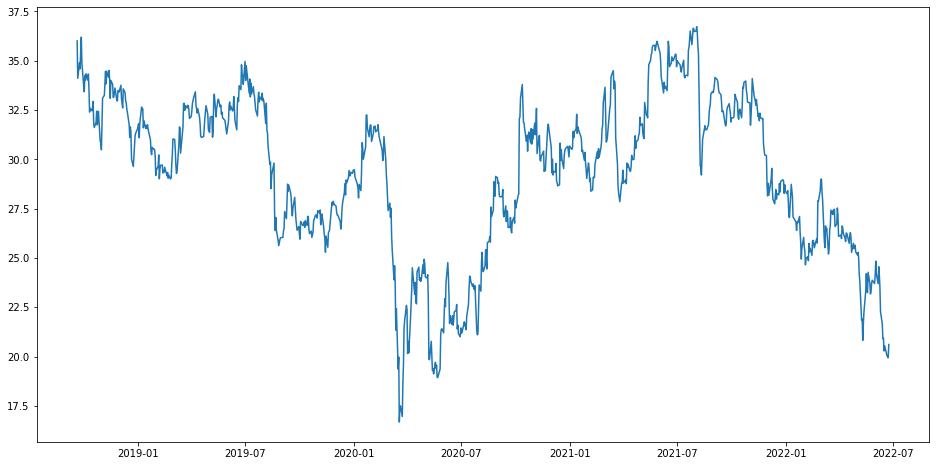

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

## Moving Average method

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('elan.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:757]
valid = new_data[757:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-190+i:].sum() + sum(preds)
    b = a/190
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-09-20  32.250000  36.009998  32.049999  36.000000  36.000000  40182700
1  2018-09-21  34.560001  35.490002  33.880001  34.099998  34.099998   9269500
2  2018-09-24  34.099998  35.650002  33.700001  34.900002  34.900002   2769100
3  2018-09-25  34.759998  34.990002  34.060001  34.580002  34.580002   3152200
4  2018-09-26  34.349998  35.980000  34.250000  35.500000  35.500000   5835600

 Shape of the data:
(947, 7)

 Shape of training set:
(757, 2)

 Shape of validation set:
(190, 2)

 RMSE value on validation set:
6.661562561219294


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


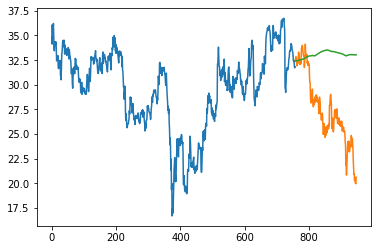

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

#### MA method performed poorly
---

## k-Nearest Neighbors method

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#read the file
df = pd.read_csv('elan.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
#creating a separate dataset
new_data = pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close'])
#split into train and validation
train = new_data[:757]
valid = new_data[757:]

In [ ]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1.5805344423647134

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


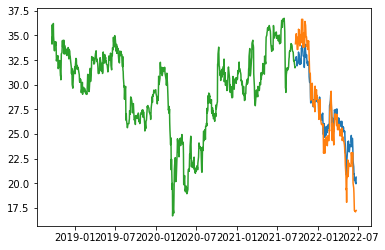

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

#### k-Nearest Neighbours performed ideal

---

## Auto ARIMA method

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 27.7 MB/s 
     |████████████████████████████████| 9.8 MB 57.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:757]
valid = data[757:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=190)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2092.484, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1919.227, Time=0.79 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2093.962, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1812.658, Time=1.78 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.60 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1810.697, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1917.418, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.50 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1812.665, Time=1.05 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1813.233, Time=2.57 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1812.

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

6.964459787154068

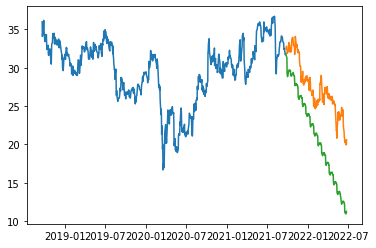

In [ ]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

#### Auto ARIMA method performed poorly

---

## Long Short Term Memory Method

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


df = pd.read_csv('elan.csv')
df['Date'] = pd.to_datetime(df['Date'])

#creating a separate dataset
new_data = pd.DataFrame(df,columns=['Date', 'Close'])

#creating dataframe
data = df.sort_index(ascending=True, axis=0)

new_data

,Date,Close
0,2018-09-20,36.000000
1,2018-09-21,34.099998
2,2018-09-24,34.900002
3,2018-09-25,34.580002
4,2018-09-26,35.500000
...,...,...
942,2022-06-17,20.549999
943,2022-06-21,20.030001
944,2022-06-22,20.010000
945,2022-06-23,19.940001


In [ ]:
x_train.shape

(757, 3)

In [ ]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:757,:]
valid = dataset[757:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 190 values, using past 40 from the train data
inputs = new_data[len(new_data) - len(valid) - 40:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
717/717 - 27s - loss: 0.0086 - 27s/epoch - 38ms/step
Epoch 2/10
717/717 - 11s - loss: 0.0040 - 11s/epoch - 16ms/step
Epoch 3/10
717/717 - 12s - loss: 0.0027 - 12s/epoch - 16ms/step
Epoch 4/10
717/717 - 12s - loss: 0.0023 - 12s/epoch - 16ms/step
Epoch 5/10
717/717 - 12s - loss: 0.0018 - 12s/epoch - 17ms/step
Epoch 6/10
717/717 - 11s - loss: 0.0018 - 11s/epoch - 16ms/step
Epoch 7/10
717/717 - 12s - loss: 0.0018 - 12s/epoch - 16ms/step
Epoch 8/10
717/717 - 11s - loss: 0.0017 - 11s/epoch - 16ms/step
Epoch 9/10
717/717 - 11s - loss: 0.0018 - 11s/epoch - 15ms/step
Epoch 10/10
717/717 - 12s - loss: 0.0018 - 12s/epoch - 16ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.6788517437929011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


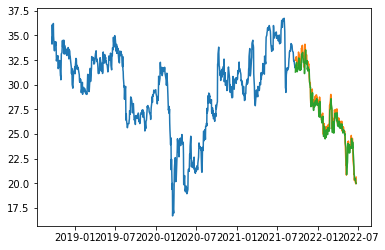

In [ ]:
#for plotting
train = new_data[:757]
valid = new_data[757:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

#### LSTM model performed the best among all
#### k-Nearest Neighbor is the second best
---
# LSTM model predict future prices

In [138]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


df = pd.read_csv('elan.csv')
df['Date'] = pd.to_datetime(df['Date'])

#creating a separate dataset
new_data = pd.DataFrame(df,columns=['Date', 'Close'])

#creating dataframe
data = df.sort_index(ascending=True, axis=0)

new_data.columns

Index(['Date', 'Close'], dtype='object')

In [140]:
future_dates = pd.date_range(start='06/25/2022', periods=40)
future_dates_df = pd.DataFrame(future_dates, columns = ['Date'])
new_df = pd.concat([new_data, future_dates_df], axis = 0)
new_df

,Date,Close
0,2018-09-20,36.000000
1,2018-09-21,34.099998
2,2018-09-24,34.900002
3,2018-09-25,34.580002
4,2018-09-26,35.500000
...,...,...
35,2022-07-30,NaN
36,2022-07-31,NaN
37,2022-08-01,NaN
38,2022-08-02,NaN


In [109]:
new_df.values

array([[Timestamp('2018-09-20 00:00:00'), 36.0],
       [Timestamp('2018-09-21 00:00:00'), 34.099998],
       [Timestamp('2018-09-24 00:00:00'), 34.900002],
       ...,
       [Timestamp('2022-08-01 00:00:00'), nan],
       [Timestamp('2022-08-02 00:00:00'), nan],
       [Timestamp('2022-08-03 00:00:00'), nan]], dtype=object)

In [75]:
#setting index
new_df.index = new_df.Date
new_df.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_df.values

train = dataset[0:947,:]
prediction = dataset[947:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 40 values, using past 40 from the train data
inputs = new_df[len(new_df) - len(prediction) -40:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediction_price = model.predict(X_test)
prediction_price = scaler.inverse_transform(prediction_price)

Epoch 1/10
907/907 - 17s - loss: 0.0078 - 17s/epoch - 19ms/step
Epoch 2/10
907/907 - 13s - loss: 0.0028 - 13s/epoch - 15ms/step
Epoch 3/10
907/907 - 13s - loss: 0.0021 - 13s/epoch - 15ms/step
Epoch 4/10
907/907 - 13s - loss: 0.0018 - 13s/epoch - 15ms/step
Epoch 5/10
907/907 - 13s - loss: 0.0018 - 13s/epoch - 15ms/step
Epoch 6/10
907/907 - 14s - loss: 0.0016 - 14s/epoch - 15ms/step
Epoch 7/10
907/907 - 13s - loss: 0.0016 - 13s/epoch - 15ms/step
Epoch 8/10
907/907 - 13s - loss: 0.0017 - 13s/epoch - 14ms/step
Epoch 9/10
907/907 - 13s - loss: 0.0016 - 13s/epoch - 15ms/step
Epoch 10/10
907/907 - 14s - loss: 0.0016 - 14s/epoch - 15ms/step


In [79]:
prediction_price[0]

array([20.70742], dtype=float32)

In [144]:
new_df.iloc[947,1] = prediction_price[0]

In [147]:
new_df.iloc[937: 950,:]

,Date,Close
937,2022-06-10,22.270000
938,2022-06-13,21.650000
939,2022-06-14,20.900000
940,2022-06-15,20.920000
941,2022-06-16,20.280001
942,2022-06-17,20.549999
943,2022-06-21,20.030001
944,2022-06-22,20.010000
945,2022-06-23,19.940001
946,2022-06-24,20.610001


In [148]:
#setting index
new_df.index = new_df.Date
new_df.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_df.values

train = dataset[0:948,:]
prediction = dataset[948:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(40,len(train)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

#predicting 40 values, using past 40 from the train data
inputs = new_df[len(new_df) - len(prediction) -40:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(40,inputs.shape[0]):
    X_test.append(inputs[i-40:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediction_price = model.predict(X_test)
prediction_price = scaler.inverse_transform(prediction_price)

Epoch 1/10
908/908 - 20s - loss: 0.0095 - 20s/epoch - 22ms/step
Epoch 2/10
908/908 - 14s - loss: 0.0032 - 14s/epoch - 15ms/step
Epoch 3/10
908/908 - 14s - loss: 0.0024 - 14s/epoch - 15ms/step
Epoch 4/10
908/908 - 13s - loss: 0.0020 - 13s/epoch - 15ms/step
Epoch 5/10
908/908 - 13s - loss: 0.0018 - 13s/epoch - 14ms/step
Epoch 6/10
908/908 - 14s - loss: 0.0018 - 14s/epoch - 15ms/step
Epoch 7/10
908/908 - 13s - loss: 0.0017 - 13s/epoch - 14ms/step
Epoch 8/10
908/908 - 13s - loss: 0.0016 - 13s/epoch - 14ms/step
Epoch 9/10
908/908 - 13s - loss: 0.0015 - 13s/epoch - 14ms/step
Epoch 10/10
908/908 - 13s - loss: 0.0016 - 13s/epoch - 15ms/step


In [151]:
len(prediction_price)

39

In [152]:
prediction_price[0]

array([20.76898], dtype=float32)

In [154]:
new_df.reset_index(inplace = True)

In [155]:
new_df[]

,Date,Close
0,2018-09-20,36.000000
1,2018-09-21,34.099998
2,2018-09-24,34.900002
3,2018-09-25,34.580002
4,2018-09-26,35.500000
...,...,...
982,2022-07-30,NaN
983,2022-07-31,NaN
984,2022-08-01,NaN
985,2022-08-02,NaN


In [156]:
new_df.iloc[937: 950,:]

,Date,Close
937,2022-06-10,22.270000
938,2022-06-13,21.650000
939,2022-06-14,20.900000
940,2022-06-15,20.920000
941,2022-06-16,20.280001
942,2022-06-17,20.549999
943,2022-06-21,20.030001
944,2022-06-22,20.010000
945,2022-06-23,19.940001
946,2022-06-24,20.610001


In [157]:
new_df.iloc[948,1] = prediction_price[0]

In [158]:
new_df.iloc[937: 950,:]

,Date,Close
937,2022-06-10,22.270000
938,2022-06-13,21.650000
939,2022-06-14,20.900000
940,2022-06-15,20.920000
941,2022-06-16,20.280001
942,2022-06-17,20.549999
943,2022-06-21,20.030001
944,2022-06-22,20.010000
945,2022-06-23,19.940001
946,2022-06-24,20.610001
